# Deep Learning Model


To create a deep learning network, we could use a neural network with:

* Input Layer: Accepting all numerical features (dropping the sample_id).
* Hidden Layers: Using fully connected (dense) layers with ReLU activations.
* Output Layer: A dense layer with multiple units (equal to the number of target labels) and a sigmoid activation for multi-label classification.

In [26]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [10]:
# Load the dataset
mars_data = pd.read_csv("Data/train_labels_augmented.csv")

# Display the data
mars_data

,sample_id,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,...,3_ratio_peak_abund,3_ratio_meanstd_abund,4_ratio,4_ratio_peak_temp,4_ratio_peak_abund,4_ratio_meanstd_abund,5_ratio,5_ratio_peak_temp,5_ratio_peak_abund,5_ratio_meanstd_abund
0,S0000,0,0,0,0,0,0,0,0,1,...,0.024563,0.009736,28.0,35.420,0.010877,0.009101,19.0,105.458,0.006600,0.002841
1,S0001,0,1,0,0,0,0,0,0,0,...,0.033209,0.024006,16.0,497.404,0.093082,0.020585,18.0,-60.370,0.030234,0.019214
2,S0002,0,0,0,0,0,1,0,0,0,...,0.294738,0.075850,16.0,545.304,0.040446,0.013012,1.0,145.673,0.004003,0.001801
3,S0003,0,1,0,1,0,0,0,0,1,...,0.260027,0.061956,28.0,593.222,0.081701,0.031606,16.0,593.222,0.083077,0.028375
4,S0004,0,0,0,1,0,1,1,0,0,...,0.238290,0.082294,16.0,471.733,0.084732,0.026218,44.0,333.273,0.029998,0.013378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,S0749,0,0,0,0,0,0,0,0,0,...,0.270481,0.187613,28.0,523.057,0.130122,0.079981,16.0,228.295,0.082464,0.057972
750,S0750,0,0,0,0,0,0,1,0,0,...,0.403334,0.152057,32.0,906.311,0.158759,0.122547,16.0,664.846,0.079410,0.041182
751,S0751,0,0,0,0,0,0,0,1,0,...,0.261788,0.143669,28.0,-60.026,0.065964,0.068941,32.0,96.019,0.032240,0.019636
752,S0752,0,0,0,1,0,0,0,0,0,...,0.086638,0.051900,1.0,259.552,0.029574,0.018446,36.0,489.092,0.027185,0.016657


In [11]:
# Data preprocessing 
# Drop 'sample_id' and separate features and target labels
X = mars_data.drop(columns=['sample_id', 'basalt', 'carbonate', 'chloride', 'iron_oxide', 'oxalate', 'oxychlorine',
                       'phyllosilicate', 'silicate', 'sulfate', 'sulfide'])
y = mars_data[['basalt', 'carbonate', 'chloride', 'iron_oxide', 'oxalate', 'oxychlorine',
          'phyllosilicate', 'silicate', 'sulfate', 'sulfide']]

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Define the model structure as a Sequential model (a simple stack of layers)
model = tf.keras.models.Sequential([

    # Input layer: defines the shape of the input data
    # This will accept data with a number of features equal to the number of columns in X_train
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

    # First hidden layer with 128 units:
    # - 'Dense' means it's a fully connected layer where each node is connected to each node in the previous layer.
    # - 'relu' (Rectified Linear Unit) activation function helps introduce non-linearity to model complex patterns.
    tf.keras.layers.Dense(128, activation='relu'),

    # Second hidden layer with 64 units, also using 'relu' activation:
    # - Reducing the number of nodes gradually helps the model learn a hierarchy of features.
    tf.keras.layers.Dense(64, activation='relu'),

    # Third hidden layer with 32 units, again using 'relu' activation:
    # - Further reduction in node count, which helps the model focus on learning higher-level abstractions.
    tf.keras.layers.Dense(32, activation='relu'),

    # Output layer with 'y_train.shape[1]' units, using 'sigmoid' activation:
    # - We use one output unit per target label for multi-label classification.
    # - 'sigmoid' activation outputs probabilities for each label (values between 0 and 1).
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

# The Sequential model structure allows for easy stacking of layers in a linear sequence from input to output
# This model is suitable for tabular data and multi-label classification tasks.


This line sets up the model’s training process as follows:

* The Adam optimizer will adjust the model's weights.
* Binary Cross-Entropy will serve as the criterion to minimize, aligning predictions closely with true labels.
* Accuracy will be tracked for monitoring how well the model is performing across epochs.

In [27]:
# Compile model

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# Choose binary_crossentropy as the loss function since this is a multi-label classification problem
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



In [28]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5659 - loss: 0.1155 - val_accuracy: 0.4437 - val_loss: 0.3425
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5807 - loss: 0.1073 - val_accuracy: 0.4636 - val_loss: 0.3495
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6154 - loss: 0.1037 - val_accuracy: 0.4503 - val_loss: 0.3396
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5841 - loss: 0.1001 - val_accuracy: 0.4437 - val_loss: 0.3454
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5838 - loss: 0.0999 - val_accuracy: 0.4636 - val_loss: 0.3628
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6149 - loss: 0.0986 - val_accuracy: 0.4636 - val_loss: 0.3608
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5947 - loss: 0.1002 - val_accuracy: 0.4702 - val_loss: 0.3610
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5858 - loss: 0.0966 - val_accuracy: 0.4570 - val_los

In [29]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4833 - loss: 0.5251
Test Loss: 0.5147, Test Accuracy: 0.4967


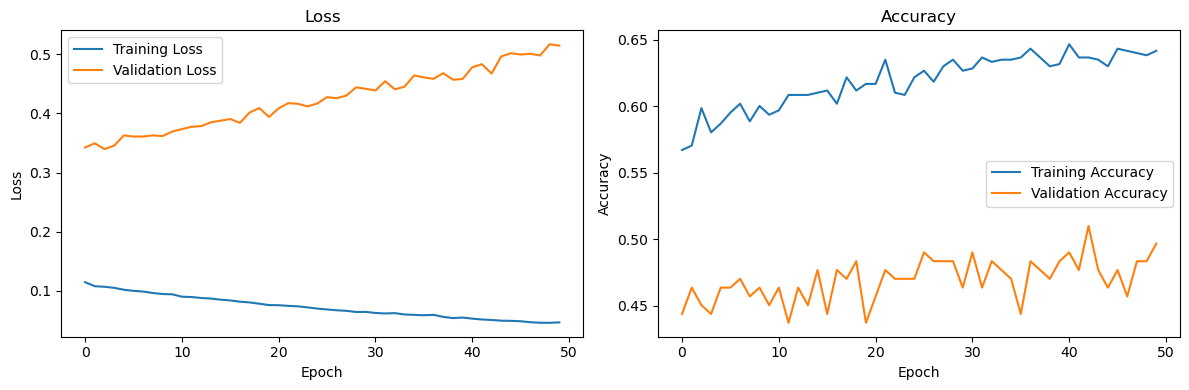

In [30]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()